Importing Libraries

In [385]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import re
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


Loading Email Dataset

In [353]:
df = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Syntecxhub-Internship-Programme\Spam Detection\datasets\emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [354]:
df.duplicated().sum()

np.int64(33)

In [355]:
df.drop_duplicates(inplace=True)

In [356]:
df.duplicated().sum()

np.int64(0)

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5695 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5695 non-null   object
 1   spam    5695 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 133.5+ KB


In [358]:
df['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

Data Splitting

In [359]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [360]:
train.head()

,text,spam
2862,Subject: congratulations ! you did again ! i ...,0
43,"Subject: 10 minutes before sex , lasts for 24 ...",1
1891,"Subject: storage model back - testing brad , ...",0
3201,"Subject: a request vince , i am writing to a...",0
3451,Subject: enron global messaging announcement ...,0


Preprocessing 

In [361]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'^subject\s*:', '', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

In [362]:
train['clean_text'] = train['text'].apply(clean_text)
train.head()

,text,spam,clean_text
2862,Subject: congratulations ! you did again ! i ...,0,congratulations read recent accomplishment con...
43,"Subject: 10 minutes before sex , lasts for 24 ...",1,10 minutes sex lasts 24 36 hours legal prescri...
1891,"Subject: storage model back - testing brad , ...",0,storage model back testing brad success automa...
3201,"Subject: a request vince , i am writing to a...",0,request vince writing ask help research john l...
3451,Subject: enron global messaging announcement ...,0,enron global messaging announcement last month...


In [363]:
train.drop('text', axis=1, inplace=True)

In [364]:
train.head()

,spam,clean_text
2862,0,congratulations read recent accomplishment con...
43,1,10 minutes sex lasts 24 36 hours legal prescri...
1891,0,storage model back testing brad success automa...
3201,0,request vince writing ask help research john l...
3451,0,enron global messaging announcement last month...


Feature Selection

In [365]:
x = train['clean_text']
y = train['spam']

Data Splitting 

In [366]:
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.2, random_state=42)

Model Development

In [367]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('mnb', MultinomialNB(alpha=0.5))
])

In [368]:
pipe.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('tfidf', ...), ('mnb', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [369]:
y_pred = pipe.predict(x_validate)

In [383]:
ac_val = accuracy_score(y_validate, y_pred)
print(f'Accuracy Score is: {ac_val}')

Accuracy Score is: 0.9385964912280702


In [371]:
CR_mnb = classification_report(y_validate, y_pred, output_dict=True)
CR_mnb = pd.DataFrame(CR_mnb)
CR_mnb

,0,1,accuracy,macro avg,weighted avg
precision,0.924731,1.000000,0.938596,0.962366,0.943218
recall,1.000000,0.750000,0.938596,0.875000,0.938596
f1-score,0.960894,0.857143,0.938596,0.909018,0.935411
support,688.000000,224.000000,0.938596,912.000000,912.000000


Test Set Transformation

In [372]:
test['clean_text'] = test['text'].apply(clean_text)
test.head()

,text,spam,clean_text
1436,"Subject: eprm article hi vince , ? as alway...",0,eprm article hi vince always good see houston ...
748,Subject: fluid analysis our customer speak vo...,1,fluid analysis customer speak volumes spur pro...
4126,Subject: re : liquids limits oct . 20 john : ...,0,liquids limits oct 20 john week looking forwar...
1448,Subject: computer recently a new person moved...,0,computer recently new person moved space 32 nd...
3905,Subject: re : visual numerics cnl licensing is...,0,visual numerics cnl licensing issues rakesh co...


In [373]:
test.drop('text', axis=1, inplace=True)

In [384]:
test.head()

,spam,clean_text
1436,0,eprm article hi vince always good see houston ...
748,1,fluid analysis customer speak volumes spur pro...
4126,0,liquids limits oct 20 john week looking forwar...
1448,0,computer recently new person moved space 32 nd...
3905,0,visual numerics cnl licensing issues rakesh co...


Feature Selection

In [374]:
x_test = train['clean_text']
y_test = train['spam']

Model Evaluation on Test Set

In [378]:
y_pred_test = pipe.predict(x_test)

In [382]:
ac_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy Score is: {ac_test}')

Accuracy Score is: 0.9727831431079894


In [379]:
CR_test = classification_report(y_test, y_pred_test, output_dict=True)
CR_test = pd.DataFrame(CR_test)
CR_test

,0,1,accuracy,macro avg,weighted avg
precision,0.966149,0.997899,0.972783,0.982024,0.973619
recall,0.999426,0.886194,0.972783,0.942810,0.972783
f1-score,0.982506,0.938735,0.972783,0.960620,0.972207
support,3484.000000,1072.000000,0.972783,4556.000000,4556.000000


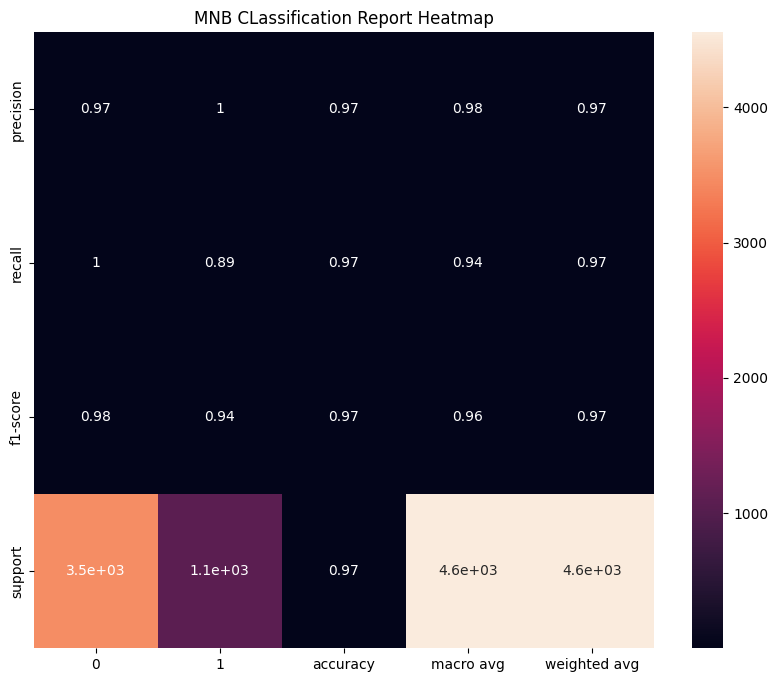

In [380]:
plt.figure(figsize=(10,8))
sns.heatmap(data=CR_test, annot=True)
plt.title('MNB CLassification Report Heatmap')
plt.show()

In [386]:
joblib.dump(pipe, 'spam detection model.pkl')

['spam detection model.pkl']